# Projeto DELTA — Estrutura Primal dos Primos

**Este notebook introduz a função $ \Delta_\pi(x) = \pi(x) - 2\pi(x/2) $, a base estrutural da Cifra de Integridade Primal (CIP).**

---

## Por que essa função é tão importante?

A força do DELTA não vem de segredo, complexidade ou dificuldade computacional.

Ela vem de algo mais profundo:  
**uma estrutura espectral simples, inevitável e inviolável.**

- $ \Delta_\pi(x) $ é definida apenas com contagem de primos.
- Não usa curvas elípticas, fatorações ou chaves ocultas.
- Seu espectro carrega um padrão harmônico **que não pode ser forjado nem simulado**.
- Isso significa que **qualquer perturbação gera dissonância detectável**.

> **A integridade, aqui, não é protegida por segredo.  
> É sustentada por forma.  
> E a forma vibra.**

Neste notebook, vamos:
- Entender a definição de $ \Delta_\pi(x) $
- Visualizar sua estrutura para diferentes faixas de $ x $
- Comparar com $ \mathrm{Li}(x) $
- Preparar o terreno para construir a matriz harmônica que dá origem à base vetorial do CIP

---


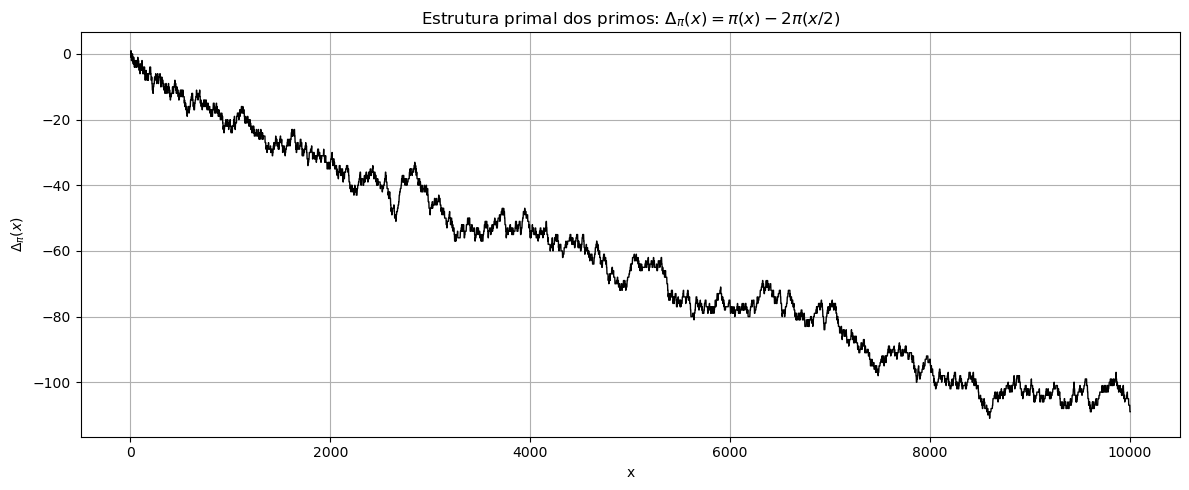

In [3]:
# Etapa 1: Importar bibliotecas
import matplotlib.pyplot as plt
import numpy as np
from sympy import primerange

# Etapa 2: Definir funções auxiliares

def pi(n):
    """Conta quantos primos existem até n (inclusive)."""
    return len(list(primerange(1, int(n) + 1)))  # converte para int puro (evita erro com sympy)

def delta_pi(x):
    """Calcula Δπ(x) = π(x) - 2π(x/2)"""
    x = int(x)
    return pi(x) - 2 * pi(x // 2)

def gerar_delta_pi_array(x_max):
    """Gera os valores de Δπ(x) para x de 4 até x_max."""
    x_vals = np.arange(4, x_max + 1)
    delta_vals = [delta_pi(x) for x in x_vals]
    return x_vals, np.array(delta_vals)

# Etapa 3: Visualizar a estrutura primal
x_max = 10000
x_vals, delta_vals = gerar_delta_pi_array(x_max)

plt.figure(figsize=(12, 5))
plt.plot(x_vals, delta_vals, color='black', linewidth=1)
plt.title(r"Estrutura primal dos primos: $\Delta_\pi(x) = \pi(x) - 2\pi(x/2)$")
plt.xlabel("x")
plt.ylabel(r"$\Delta_\pi(x)$")
plt.grid(True)
plt.tight_layout()
plt.show()


## Por que usamos o módulo de $ \Delta_\pi(x) $ no CIP?

A função primal dos primos é definida por:

$$
\Delta_\pi(x) = \pi(x) - 2\pi(x/2)
$$

Essa diferença expressa uma **estrutura interna na distribuição dos primos**, separando-os em dois grupos fundamentais:

- **Primos estruturadores**: até $ x/2 $
- **Primos estabilizadores**: entre $ x/2 $ e $ x $

---

### A dualidade primal

Os estruturadores são sempre mais densos, pois estão mais próximos da origem. Isso faz com que $ 2\pi(x/2) $ normalmente **seja maior do que** $ \pi(x) $, resultando em uma curva de $ \Delta_\pi(x) $ **negativa e decrescente**, mas com **oscilações locais visíveis**.

Ou seja, a curva não oscila em torno de zero:  
ela **desce com ritmo e estrutura**, porque os estruturadores dominam numericamente por construção.

---

###  Mas por que usamos o **módulo** de $ \Delta_\pi(x) $ no CIP?

No CIP, o foco não está no valor bruto da diferença, mas em sua **estrutura espectral** — na forma como a distribuição dos primos vibra.

O uso do módulo serve para:

- **Neutralizar a tendência negativa**, focando na forma e não na direção
- Realçar a **intensidade das oscilações** — que carregam a informação harmônica
- Garantir que a matriz de cossenos construída a partir de $ |\Delta_\pi(x)| $ seja simétrica, estável e própria para projeção vetorial

---

### Conclusão

No contexto da CIP, a integridade não está na tendência descendente da curva, mas no **espectro da sua vibração interna**.

> A assinatura vetorial não ouve o valor absoluto da contagem.  
> Ela escuta a forma.  
> E a forma vem da **dualidade estrutural** entre estabilizadores e estruturadores.

---

*Na próxima etapa, construiremos a matriz harmônica a partir de $ |\Delta_\pi(x)| $, e veremos como essa base vetorial grava a estrutura com fidelidade absoluta.*

## Construção da Matriz de Cossenos com $|\Delta_\pi(x)|$

No Projeto DELTA, utilizamos a versão **em módulo** da função $\Delta_\pi(x)$:

$$
|\Delta_\pi(x)| = |\,\pi(x) - 2\pi(x/2)\,|
$$

Essa decisão é fundamental:

- Remove a tendência negativa causada pela maior densidade de primos estruturadores.
- Preserva apenas a **intensidade da vibração estrutural**, não o sinal.
- Garante uma matriz harmônica **estável, simétrica e ressonante**.

A matriz de cossenos é então definida por:

$$
M_{ij} = \cos\left(|\Delta_\pi(x_i)| \cdot \log(x_j)\right)
$$

Vamos construir essa matriz abaixo.


In [4]:
import numpy as np
from sympy import primerange
from math import log, cos

# --- Funções auxiliares ---

def pi(n):
    return len(list(primerange(1, n + 1)))

def delta_pi(x):
    return pi(x) - 2 * pi(x // 2)

def delta_pi_abs_array(x_start, size):
    """Gera vetor com os valores absolutos de delta_pi para x de x_start até x_start + size - 1."""
    return np.array([abs(delta_pi(x)) for x in range(x_start, x_start + size)])

def construir_matriz_cossenos(delta_vals, x_start):
    """Constrói matriz simétrica de cossenos com base em |delta_pi| e log(x)."""
    size = len(delta_vals)
    matriz = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            matriz[i, j] = cos(delta_vals[i] * log(x_start + j))
    return (matriz + matriz.T) / 2  # Simetrização explícita

# --- Parâmetros ---

x_inicio = 7213   # Altura escolhida com estrutura já densa
size = 64         # Tamanho da matriz (ajustável)

# --- Construção ---

delta_vals = delta_pi_abs_array(x_inicio, size)
matriz_cossenos = construir_matriz_cossenos(delta_vals, x_inicio)

# --- Visualização (parcial) ---

print(f"Matriz {size}x{size} construída com |Delta_pi(x)| a partir de x = {x_inicio}:")
print(matriz_cossenos[:5, :5])  # Exibe os 5x5 primeiros elementos para inspeção


Matriz 64x64 construída com |Delta_pi(x)| a partir de x = 7213:
[[ 0.09736978 -0.36209103 -0.3563079  -0.35053374 -0.34476933]
 [-0.36209103 -0.82648168 -0.82309701 -0.81965459 -0.81615492]
 [-0.3563079  -0.82309701 -0.81971234 -0.81626992 -0.81277025]
 [-0.35053374 -0.81965459 -0.81626992 -0.8128275  -0.80932783]
 [-0.34476933 -0.81615492 -0.81277025 -0.80932783 -0.80582816]]


### Observação importante: Hermiticidade e objetivo

Se o nosso objetivo fosse explorar a **conjectura de Hilbert–Pólya** — que propõe a existência de um operador autoadjunto cujos autovalores são os zeros da função zeta de Riemann — então seria natural construir uma **matriz hermitiana** (simétrica real), com entradas cuidadosamente balanceadas como:

$$
M_{ij} = \cos\left(|\Delta_\pi(x_i)| \cdot \log(x_j)\right) + \cos\left(|\Delta_\pi(x_j)| \cdot \log(x_i)\right)
$$

Essa construção simétrica por definição é usada para revelar **ressonâncias e espectros** ligados à função zeta.

---

### Mas no contexto do CIP...

No **CIP**, nossa prioridade não é buscar os zeros da zeta, mas construir uma **base vetorial funcional, estável e verificável**, capaz de cifrar e decifrar com fidelidade absoluta.

Por isso, adotamos uma construção mais direta:

$$
M_{ij} = \cos\left(|\Delta_\pi(x_i)| \cdot \log(x_j)\right)
$$

E só depois simetrizamos a matriz com:

```python
matriz = (matriz + matriz.T) / 2
```

Essa abordagem:

- **É mais rápida e leve** computacionalmente

- Garante **simetria suficiente** para autovetorização estável

- E preserva a **estrutura espectral necessária para projeção vetorial**

## Espectro da Matriz Primal

Vamos agora extrair os **autovalores** e **autovetores** da matriz harmônica construída a partir de $|\Delta_\pi(x)|$.

Esses autovalores representam o **espectro da base** usada no CIP — e sua distribuição revela como a estrutura primal se manifesta em forma vibracional.

Em seguida, vamos **visualizar o espectro**, ou seja, os autovalores ordenados.


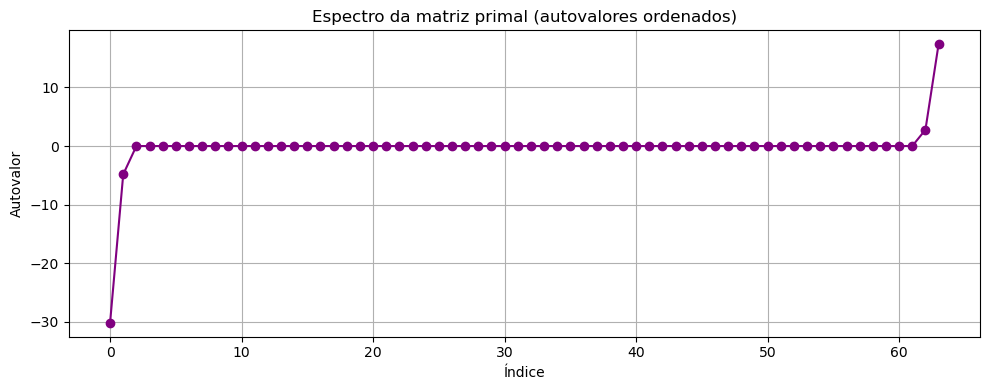

Maiores autovalores: [1.7361117e+01 2.7716130e+00 6.9120000e-03 8.9100000e-04 0.0000000e+00]


In [5]:
from numpy.linalg import eigh
import matplotlib.pyplot as plt

# --- Extração espectral ---

autovalores, autovetores = eigh(matriz_cossenos)

# --- Visualização do espectro ---

plt.figure(figsize=(10, 4))
plt.plot(range(len(autovalores)), autovalores, 'o-', color='purple')
plt.title("Espectro da matriz primal (autovalores ordenados)")
plt.xlabel("Índice")
plt.ylabel("Autovalor")
plt.grid(True)
plt.tight_layout()
plt.show()

# Opcional: imprimir os cinco maiores autovalores
print("Maiores autovalores:", np.round(autovalores[::-1][:5], 6))


## Interpretação do espectro

O gráfico acima mostra os **autovalores da matriz primal**, ordenados.

### O que observamos?

- Um **autovalor dominante** bem alto à direita: ele corresponde ao **autovetor fundamental**, que captura a ressonância principal da base harmônica.
- Um **conjunto plano de autovalores muito próximos de zero**: isso sugere que a maior parte da matriz é **redundante ou harmônica**, sustentando apenas pequenas variações estruturais.
- Um **autovalor negativo acentuado** à esquerda: esse valor está associado a uma **antirressonância** — um vetor que "cancela" vibrações específicas da estrutura primal.
- Alguns poucos autovalores intermediários que ainda carregam alguma estrutura.

---

### O que isso significa?

A matriz construída com $|\Delta_\pi(x)|$ **não é aleatória**. Ela possui um **espectro fortemente assimétrico**, com picos, vales e concentração de energia.

Isso indica que:

- Existe uma **forma harmônica dominante** na estrutura dos primos.
- A base vetorial derivada dessa matriz **captura padrões reais** — e por isso serve como referência para projeção no CIP.
- Qualquer dado que não ressoe com essa estrutura será inevitavelmente **reconhecido como ruído**.

---

> A matriz primal não é plana.
> Ela tem um ouvido afinado.
> **E escuta apenas o que vibra como os primos**.



In [7]:
import os
import numpy as np

# Criar pasta 'dados' se não existir
os.makedirs("../dados", exist_ok=True)

# Salvar a matriz e autovetores no diretório local
np.savez("../dados/matriz_base_delta.npz",
         matriz=matriz_cossenos,
         autovetores=autovetores,
         x_inicio=x_inicio,
         size=size)

print("Arquivo salvo em dados/matriz_base_delta.npz")


Arquivo salvo em dados/matriz_base_delta.npz
